Binary Classification using Logistic Regression, Neural Networks, and Random Forest

### Problem Statement
In this problem, we will predict the presence of heart disease in patients using clinical data. This practical exercise involves real-world binary classification, employing techniques you've learned:
- Logistic Regression
- Neural Networks
- Random Forest

### Dataset Description
The dataset used is the [Heart Disease UCI dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease), which contains medical attributes such as age, cholesterol levels, blood pressure, and more.

The task is to predict whether a patient has heart disease (target = 1) or not (target = 0).

### Objectives
- Perform exploratory data analysis (EDA)
- Preprocess data effectively
- Train and evaluate models: Logistic Regression, Neural Networks, Random Forest
- Compare the performance of models using appropriate metrics


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


In [2]:
# Load the dataset
url = "heart.csv"
df = pd.read_csv(url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [3]:
# Check data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Check for missing values
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


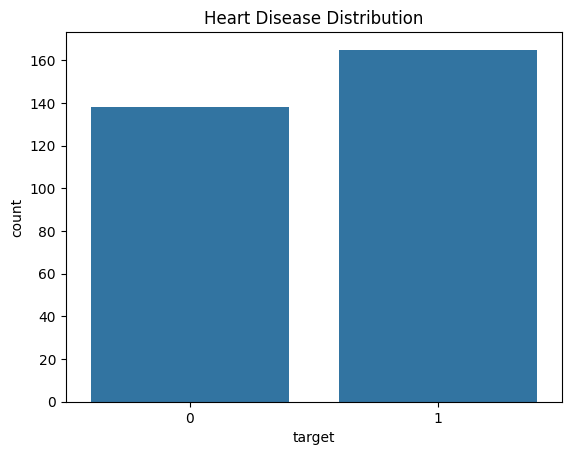

In [5]:
# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


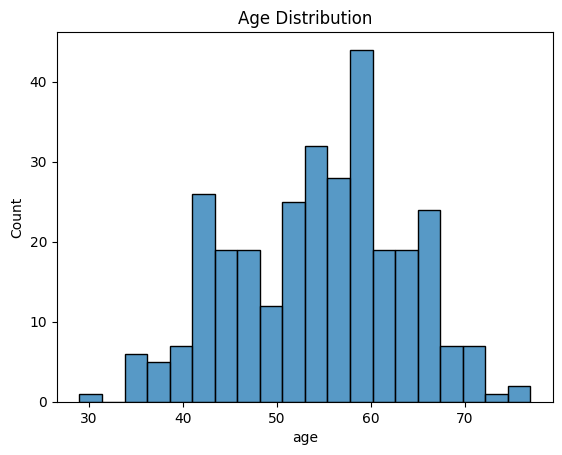

In [6]:
#age distribution
sns.histplot(df["age"], bins=20)
plt.title('Age Distribution')
plt.show()

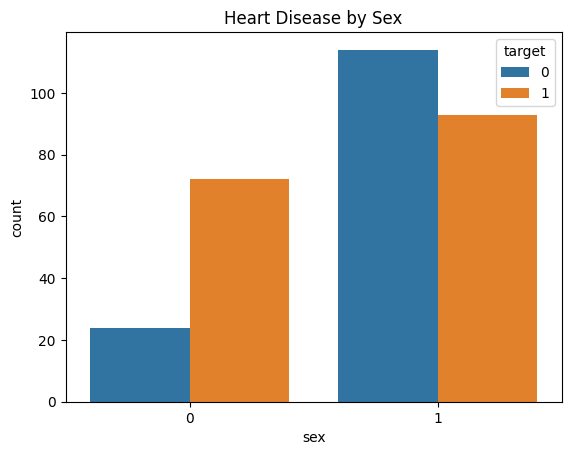

In [7]:
sns.countplot(data=df, x= 'sex', hue='target')
plt.title('Heart Disease by Sex')
plt.show()

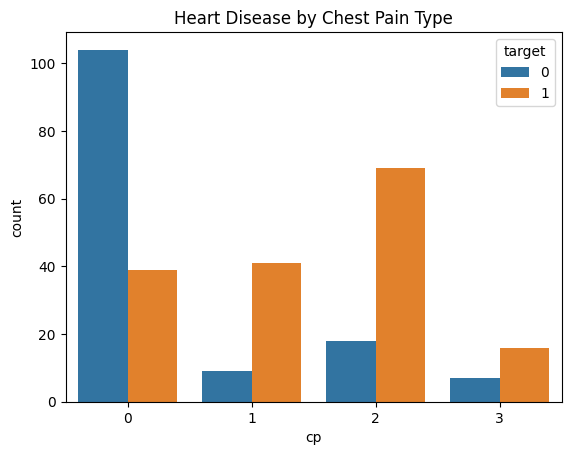

In [8]:
#Chest Pain Type vs Heart Disease
sns.countplot(data=df, x= 'cp', hue='target')
plt.title('Heart Disease by Chest Pain Type')
plt.show()

Text(0.5, 1.0, 'Cholesterol Levels vs Heart Disease')

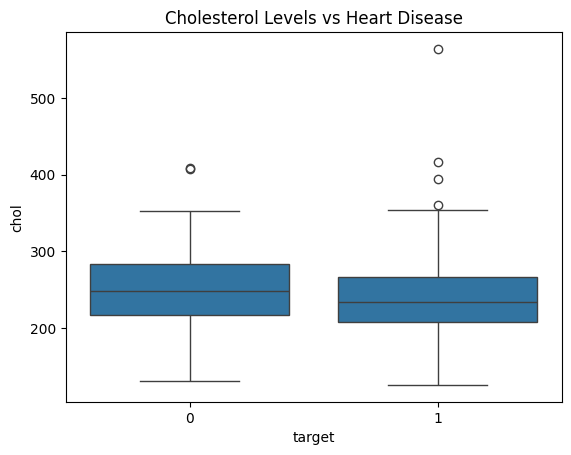

In [9]:
#Boxplots for Numeric Features vs Target
sns.boxplot(data=df, x='target', y='chol')
plt.title("Cholesterol Levels vs Heart Disease")


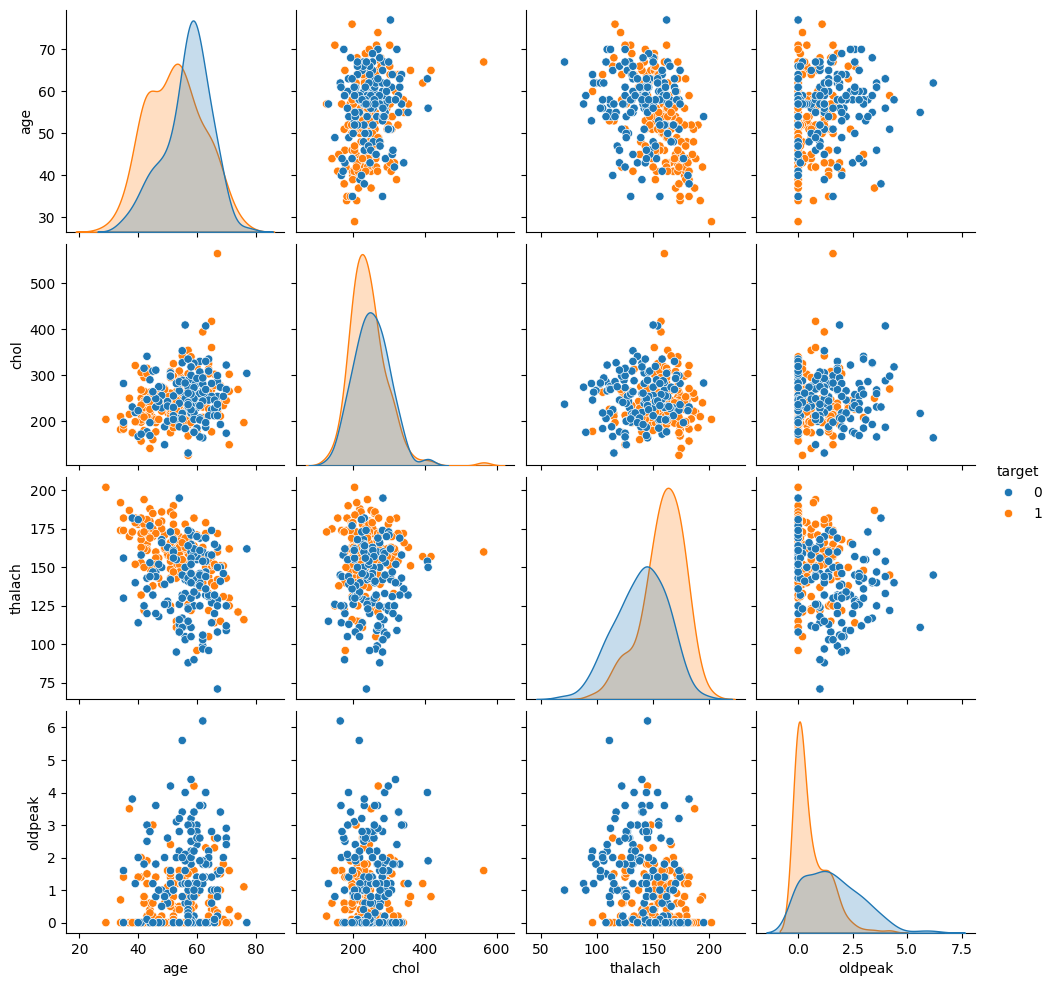

In [10]:
#Pairplot of Selected Features
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')


In [11]:
#Divide data into Features and Target
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target

# Perform Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Split into Training and Test Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Show dataset sizes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (242, 13)
Test set shape: (61, 13)


       Accuracy  Precision    Recall  F1 Score
Train  0.863636   0.847222  0.917293  0.880866
Test   0.852459   0.870968  0.843750  0.857143


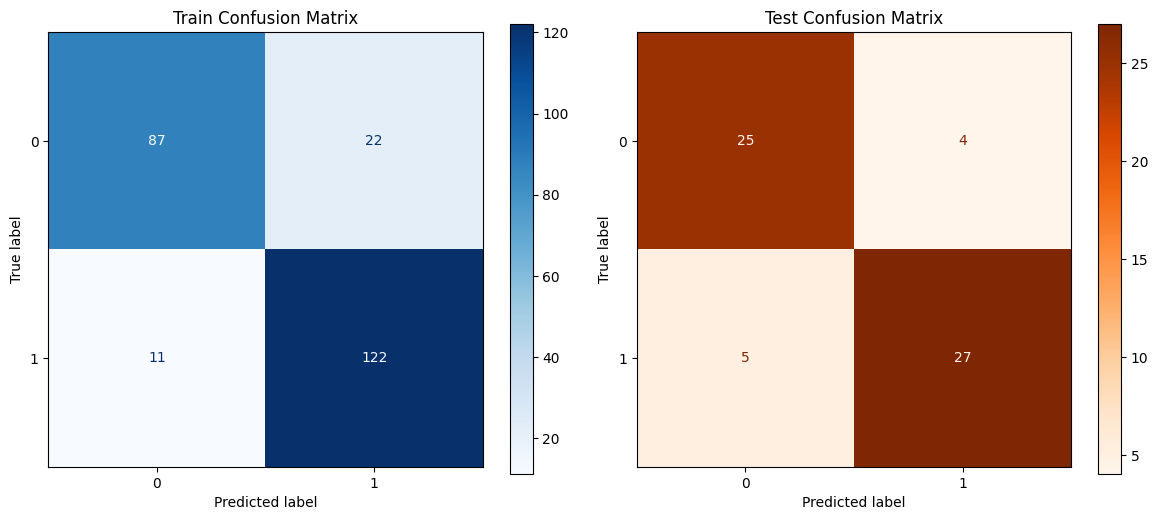

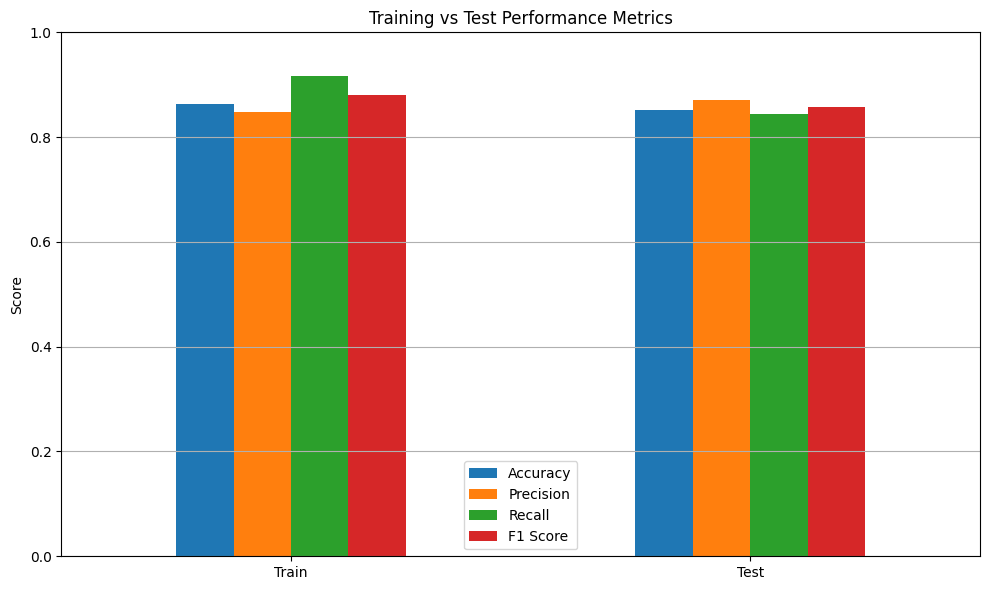

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Step 2: Load and preprocess data
df = pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 3: Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Step 4: Predictions
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Step 5: Evaluation metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

metrics_df = pd.DataFrame([train_metrics, test_metrics], index=["Train", "Test"])
print(metrics_df)

# Step 6: Confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], cmap='Blues')
axs[0].set_title("Train Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1], cmap='Oranges')
axs[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

# Step 7: Visualize metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Training vs Test Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5317 - loss: 0.6990 - val_accuracy: 0.5902 - val_loss: 0.6643
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5850 - loss: 0.6702 - val_accuracy: 0.6393 - val_loss: 0.6429
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6681 - loss: 0.6326 - val_accuracy: 0.7213 - val_loss: 0.6231
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7491 - loss: 0.6182 - val_accuracy: 0.7377 - val_loss: 0.6049
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7965 - loss: 0.5929 - val_accuracy: 0.7705 - val_loss: 0.5831
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7814 - loss: 0.5631 - val_accuracy: 0.7541 - val_loss: 0.5600
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7886 - loss: 0.5447 - val_accuracy: 0.7541 - val_loss: 0.5412
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7710 - loss: 0.5213 - val_accuracy: 0.7705 - val

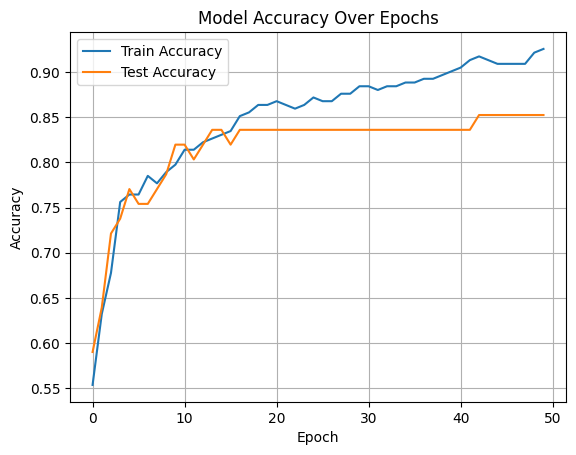

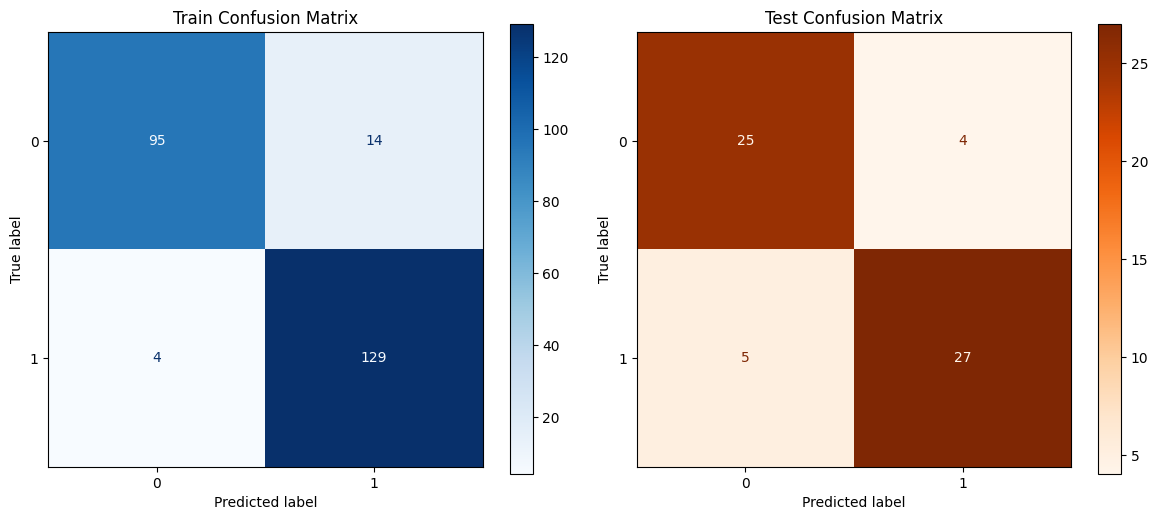

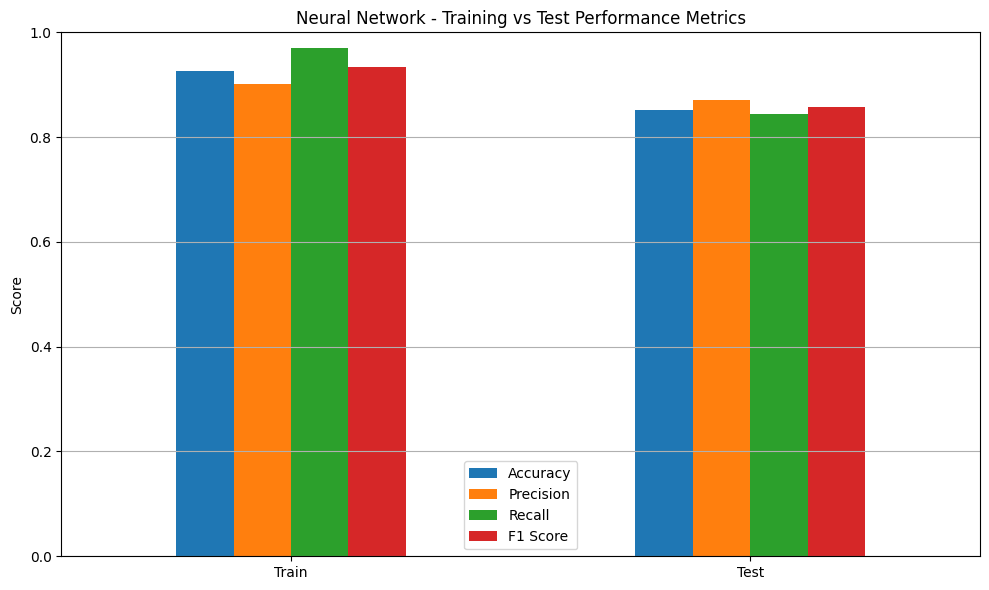

       Accuracy  Precision    Recall  F1 Score
Train  0.925620   0.902098  0.969925  0.934783
Test   0.852459   0.870968  0.843750  0.857143


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 2: Load and preprocess the data
df = pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 3: Build the Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Step 5: Predict and evaluate
y_train_pred_nn = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

train_metrics_nn = evaluate_model(y_train, y_train_pred_nn)
test_metrics_nn = evaluate_model(y_test, y_test_pred_nn)
metrics_df_nn = pd.DataFrame([train_metrics_nn, test_metrics_nn], index=["Train", "Test"])

# Step 6: Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_nn, ax=axs[0], cmap='Blues')
axs[0].set_title("Train Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_nn, ax=axs[1], cmap='Oranges')
axs[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

# Step 8: Visualize performance metrics
metrics_df_nn.plot(kind='bar', figsize=(10, 6))
plt.title("Neural Network - Training vs Test Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 9: Print metrics
print(metrics_df_nn)

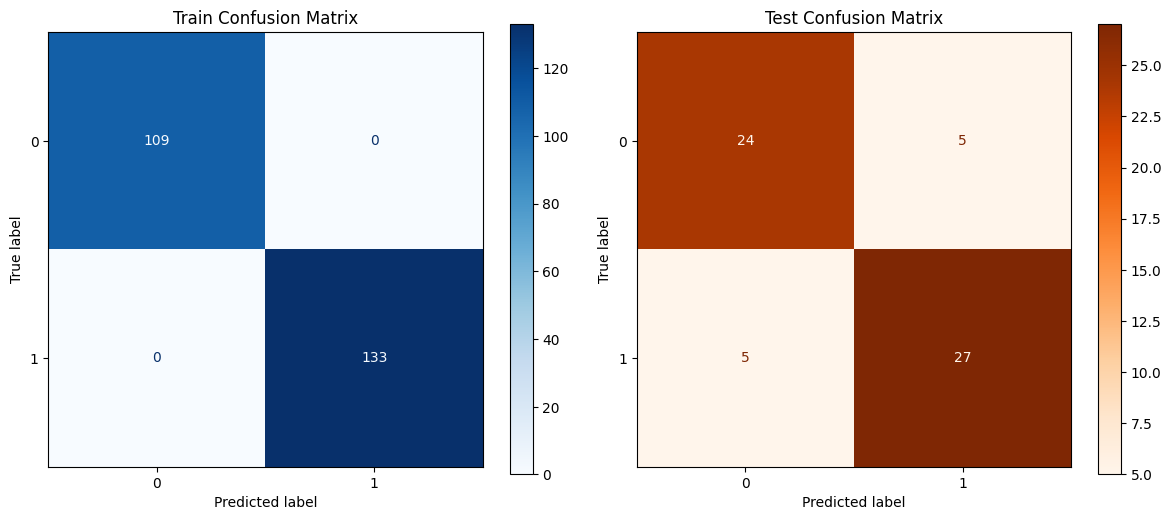

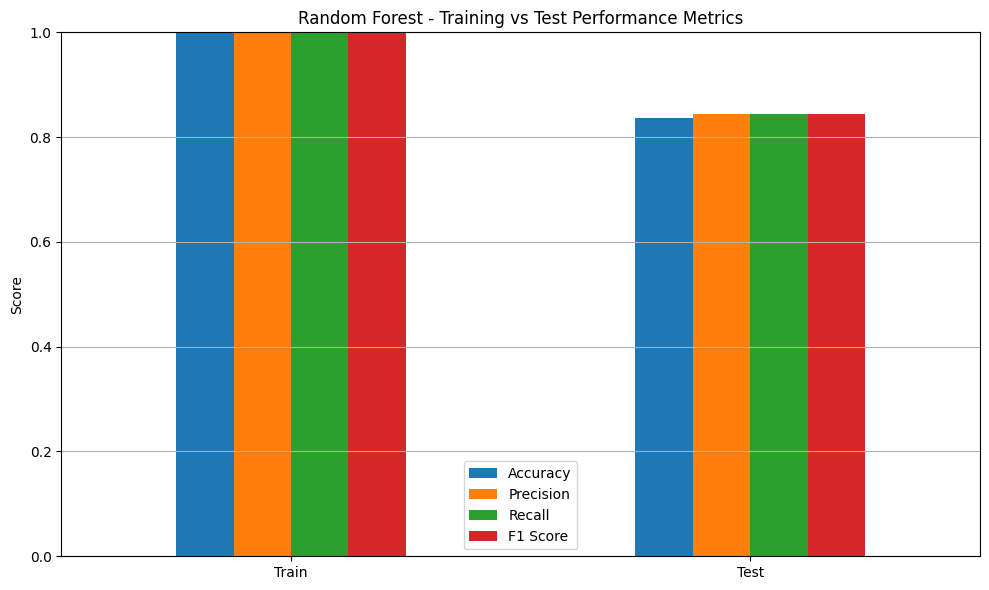

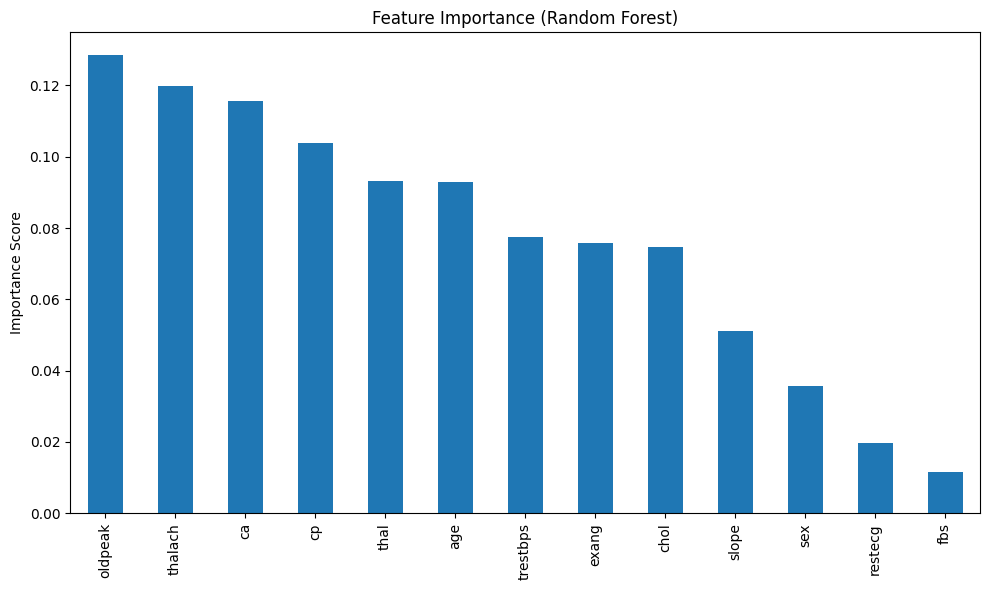

            Accuracy  Precision   Recall  F1 Score
Train       1.000000   1.000000  1.00000  1.000000
Test        0.836066   0.843750  0.84375  0.843750
Train_Top5  0.995868   0.992537  1.00000  0.996255
Test_Top5   0.786885   0.771429  0.84375  0.805970


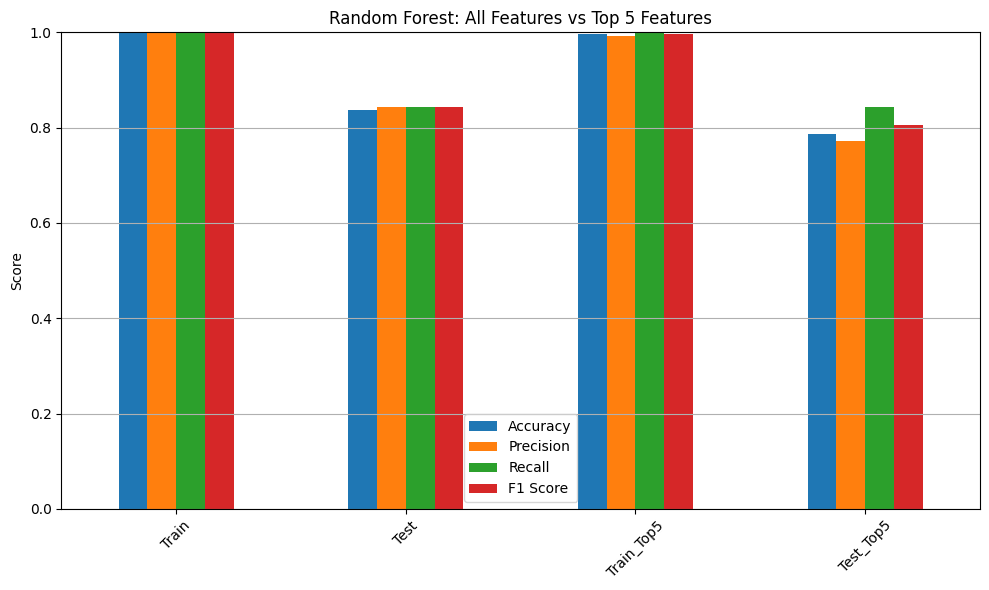

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load and preprocess the data
df = pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Step 5: Evaluation metrics function
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

train_metrics_rf = evaluate_model(y_train, y_train_pred)
test_metrics_rf = evaluate_model(y_test, y_test_pred)
metrics_df_rf = pd.DataFrame([train_metrics_rf, test_metrics_rf], index=["Train", "Test"])

# Step 6: Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], cmap='Blues')
axs[0].set_title("Train Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1], cmap='Oranges')
axs[1].set_title("Test Confusion Matrix")
plt.tight_layout()
plt.show()

# Step 7: Performance Metrics Plot
metrics_df_rf.plot(kind='bar', figsize=(10, 6))
plt.title("Random Forest - Training vs Test Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 8: Feature Importance
importances = rf_model.feature_importances_
feature_names = df.drop("target", axis=1).columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Step 9: Train on top 5 features
top_5_features = feat_imp.head(5).index.tolist()
X_top5 = df[top_5_features]
X_top5_scaled = scaler.fit_transform(X_top5)

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
    X_top5_scaled, y, test_size=0.2, random_state=42
)

rf_model_5 = RandomForestClassifier(random_state=42)
rf_model_5.fit(X_train_5, y_train_5)

y_train_5_pred = rf_model_5.predict(X_train_5)
y_test_5_pred = rf_model_5.predict(X_test_5)

# Evaluate
train_metrics_rf_5 = evaluate_model(y_train_5, y_train_5_pred)
test_metrics_rf_5 = evaluate_model(y_test_5, y_test_5_pred)
metrics_df_rf_5 = pd.DataFrame([train_metrics_rf_5, test_metrics_rf_5], index=["Train_Top5", "Test_Top5"])

# Compare both models
combined_metrics = pd.concat([metrics_df_rf, metrics_df_rf_5])
print(combined_metrics)

# Visualize comparison
combined_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Random Forest: All Features vs Top 5 Features")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


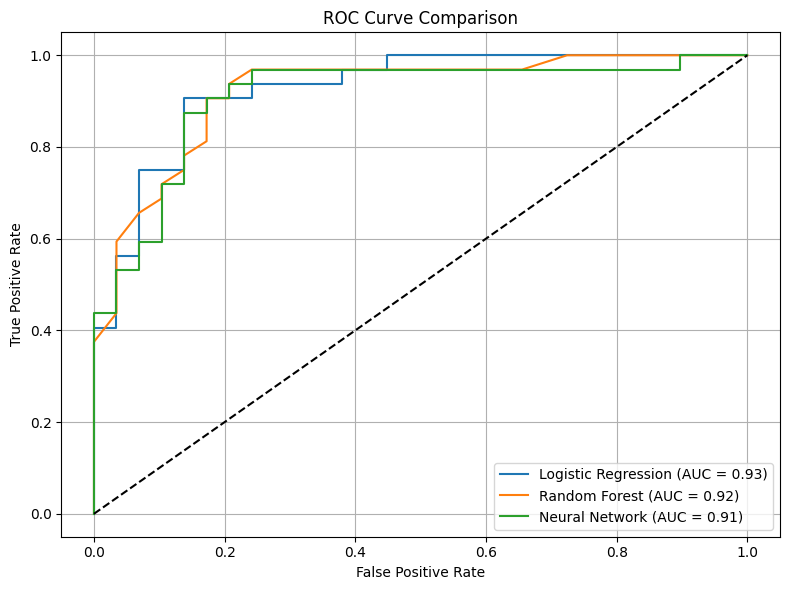

In [15]:
# Step 1: Import libraries
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Step 2: Get prediction probabilities for ROC
y_test_proba_log = log_model.predict_proba(X_test)[:, 1]                      # Logistic Regression
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]                        # Random Forest
y_test_proba_nn = model.predict(X_test).ravel()                               # Neural Network

# Step 3: ROC Curve setup
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_proba_nn)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_nn = auc(fpr_nn, tpr_nn)

# Step 4: Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no-skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                 Model  Accuracy  Precision   Recall
0  Logistic Regression  0.836066   0.843750  0.84375
1        Random Forest  0.836066   0.843750  0.84375
2       Neural Network  0.852459   0.870968  0.84375


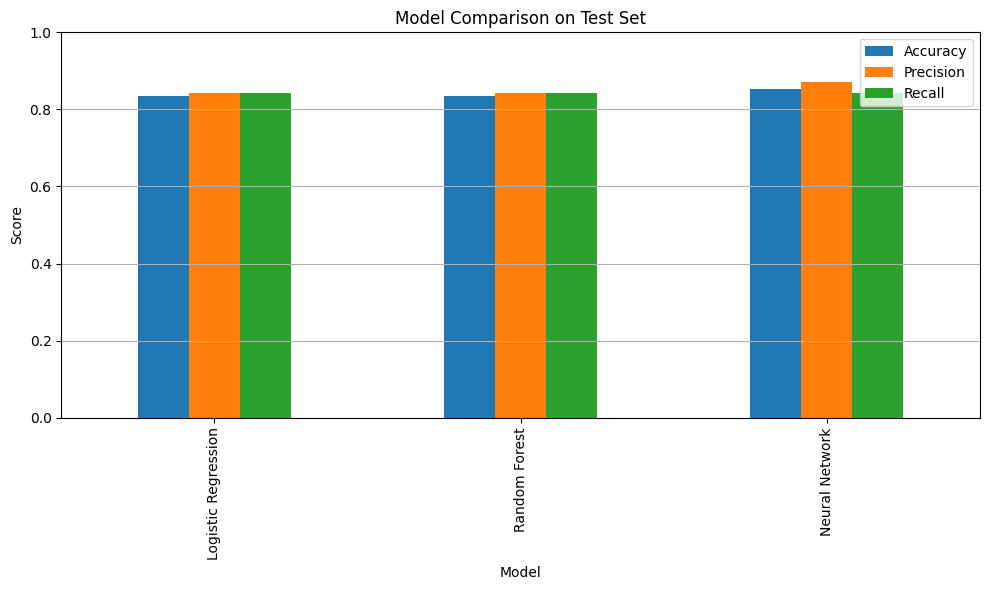

In [16]:
comparison_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, (y_test_pred_nn > 0.5).astype("int32"))
    ],
    "Precision": [
        precision_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        precision_score(y_test, (y_test_pred_nn > 0.5).astype("int32"))
    ],
    "Recall": [
        recall_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        recall_score(y_test, (y_test_pred_nn > 0.5).astype("int32"))
    ]
})

print(comparison_metrics)

# Visualize the comparison
comparison_metrics.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison on Test Set")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
